In [ ]:
# Run this cell as the first step to make sure we use the most updated version of statsmodels in python
# If it fails to import the latest version, try click Runtime -> Restart runtime and start from here again
import statsmodels

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

##

In [ ]:
elec = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/elec.csv')
elec.index = pd.date_range(start='1973-01-01', periods= elec.shape[0], freq='M')

# Define start and end date of sample
start = '1973-01-01'
end = '2011-01-01'
#elec.index
elec.head()

,date,elec
1973-01-31,1973M01,52840.231
1973-02-28,1973M02,49601.308
1973-03-31,1973M03,46314.971
1973-04-30,1973M04,41820.951
1973-05-31,1973M05,39824.999


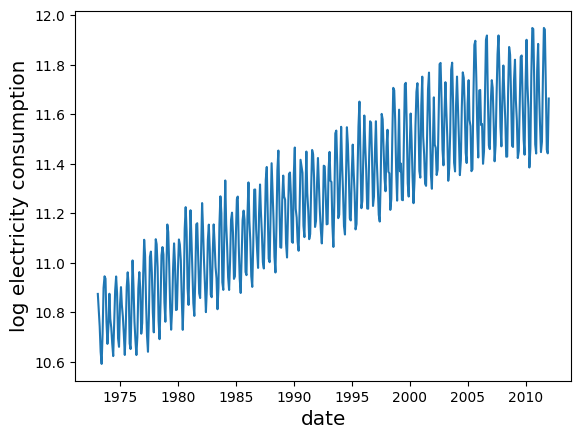

Text(0.5, 0, 'date')

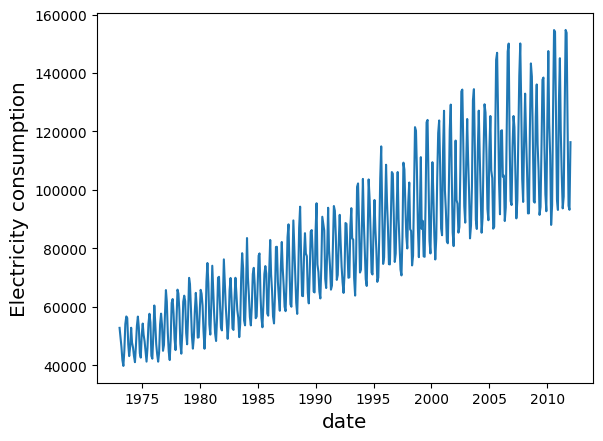

In [ ]:
plt.plot(np.log(elec['elec']))
ax = plt.gca()
ax.set_ylabel('log electricity consumption', fontsize = 'x-large')
ax.set_xlabel('date', fontsize = 'x-large')
plt.show()
plt.plot(elec['elec'])
ax = plt.gca()
ax.set_ylabel('Electricity consumption', fontsize = 'x-large')
ax.set_xlabel('date', fontsize = 'x-large')

                            OLS Regression Results                            
Dep. Variable:                   elec   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1665.
Date:                Mon, 01 May 2023   Prob (F-statistic):          5.69e-154
Time:                        21:41:59   Log-Likelihood:                 232.59
No. Observations:                 456   AIC:                            -461.2
Df Residuals:                     454   BIC:                            -452.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7756      0.014    788.826      0.0

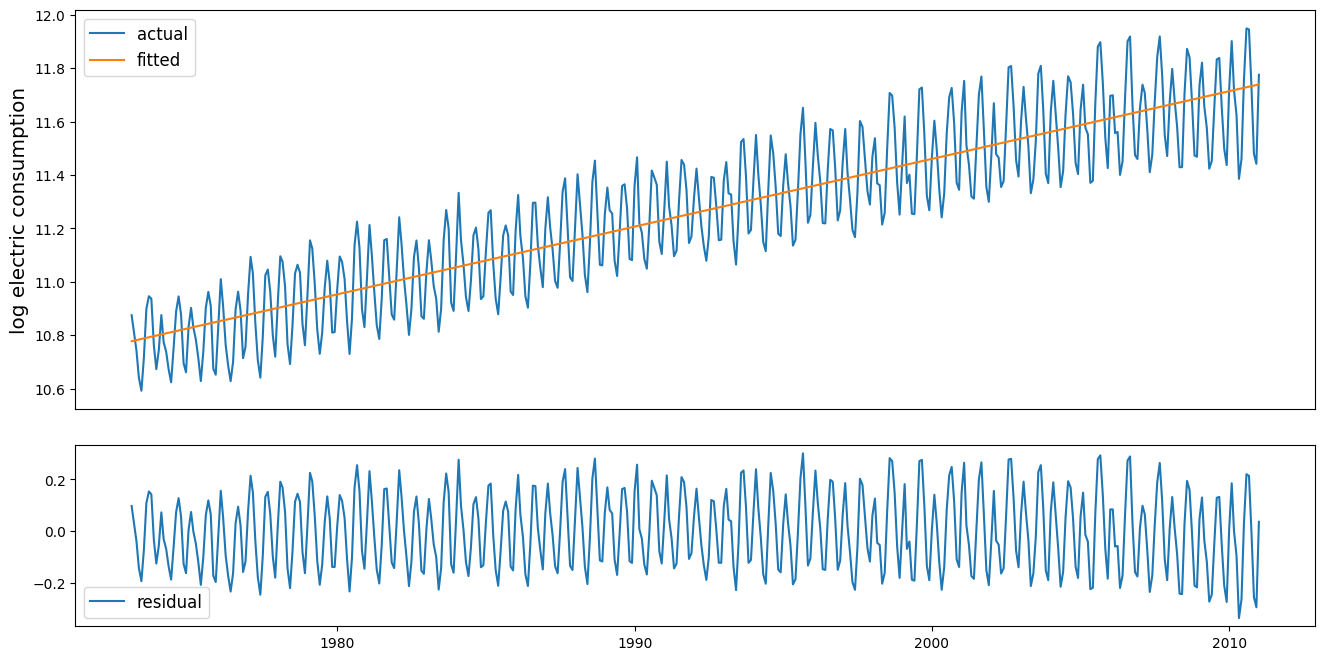

                            OLS Regression Results                            
Dep. Variable:                   elec   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     845.9
Date:                Mon, 01 May 2023   Prob (F-statistic):          1.11e-153
Time:                        21:42:00   Log-Likelihood:                 235.88
No. Observations:                 456   AIC:                            -465.8
Df Residuals:                     453   BIC:                            -453.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7365      0.020    525.738      0.0

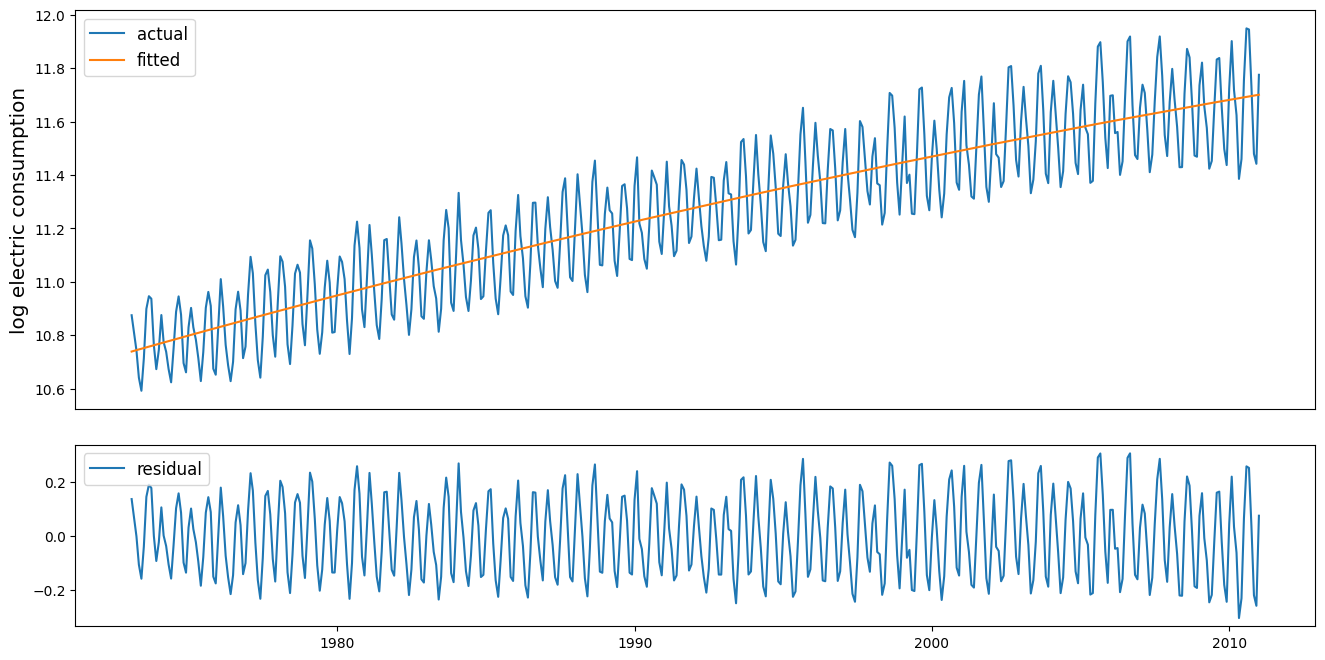

In [ ]:
#linear trend
elec['const'] = 1

elec['trend'] = np.arange(elec.shape[0]) +1

Y = np.log(elec['elec'])
X = ['const', 'trend']

result=sm.OLS(Y[:-12],elec[X][:-12], missing='drop').fit()
print(result.summary())

fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

ydata = Y[:-12]
y_fit=result.fittedvalues
residual=np.squeeze(ydata)-y_fit
ax1.plot(ydata, label = 'actual')
ax1.plot(y_fit, label = 'fitted')

ax2.plot(residual,'-', label='residual')

ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='lower left', fontsize = 'large')

ax1.set_xticks(['1980-01-01','1990-01-01', '2000-01-01', '2010-01-01'])
ax1.set_xticklabels(['1980', '1990', '2000', '2010'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)

ax1.set_ylabel('log electric consumption', fontsize='x-large')
plt.show()

#quadratic trend
elec['trend2'] = elec['trend']**2
X_quad = ['const', 'trend', 'trend2']

result_quad=sm.OLS(Y[:-12],elec[X_quad][:-12], missing='drop').fit()
print(result_quad.summary())
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

#ydata = Y[:-12]
y_fit_quad=result_quad.fittedvalues
residual_quad=np.squeeze(ydata)-y_fit_quad

ax1.plot(ydata, label = 'actual')
ax1.plot(y_fit_quad, label = 'fitted')

ax2.plot(residual_quad,'-', label='residual')

ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')

ax1.set_xticks(['1980-01-01','1990-01-01', '2000-01-01', '2010-01-01'])
ax1.set_xticklabels(['1980', '1990', '2000', '2010'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)

ax1.set_ylabel('log electric consumption', fontsize='x-large')
plt.show()

#quadratic is better - higher r-squared and lower AIC, BIC

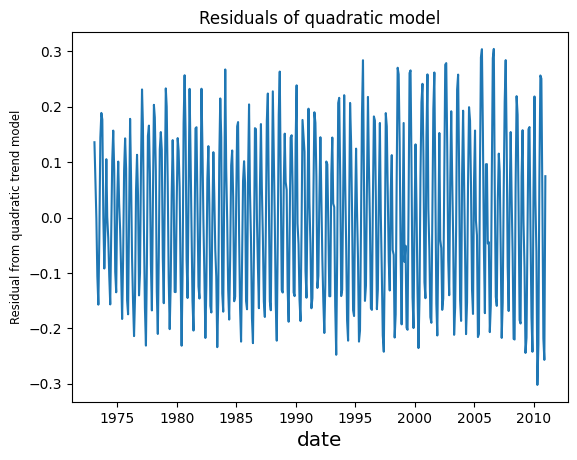

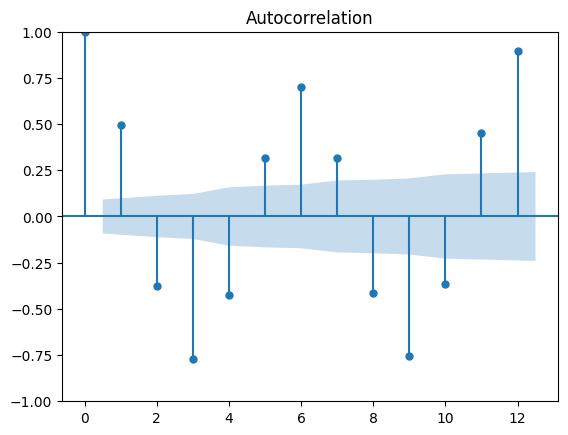

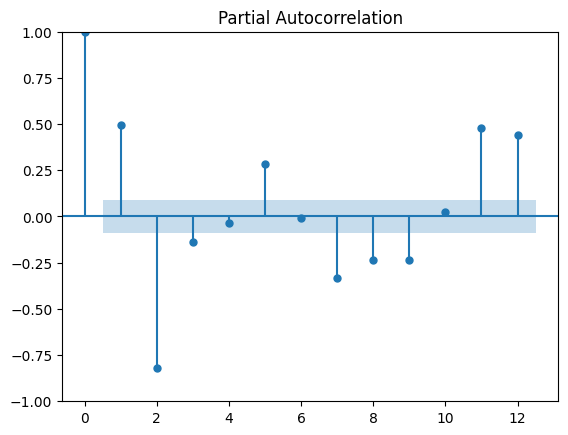

In [ ]:
plt.plot(result_quad.resid)
plt.title("Residuals of quadratic model")
ax = plt.gca()
ax.set_ylabel('Residual from quadratic trend model', fontsize = 'small')
ax.set_xlabel('date', fontsize = 'x-large')
plt.show()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(result_quad.resid, lags=12)
plot_pacf(result_quad.resid, lags=12)
plt.show()

In [ ]:
elec['month'] = pd.DatetimeIndex(elec.index).month
dummy = pd.get_dummies(elec['month'], prefix='m')

dummy_df = pd.concat([elec,dummy], axis=1)
Y = np.log(dummy_df['elec'])
X_season = ['trend', 'trend2', 'm_1','m_2','m_3','m_4','m_5','m_6','m_7','m_8','m_9','m_10','m_11','m_12']
result_season = sm.OLS(Y[:-12], dummy_df[X_season][:-12], missing='drop').fit()
print(result_season.summary())

                            OLS Regression Results                            
Dep. Variable:                   elec   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1287.
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        21:42:01   Log-Likelihood:                 715.84
No. Observations:                 456   AIC:                            -1404.
Df Residuals:                     442   BIC:                            -1346.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
trend          0.0026   7.29e-05     36.063      0.0

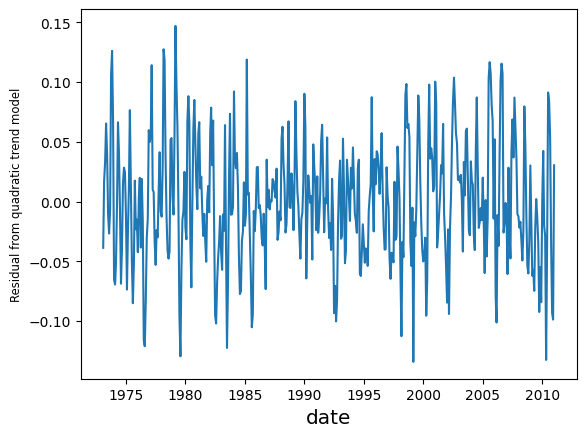

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


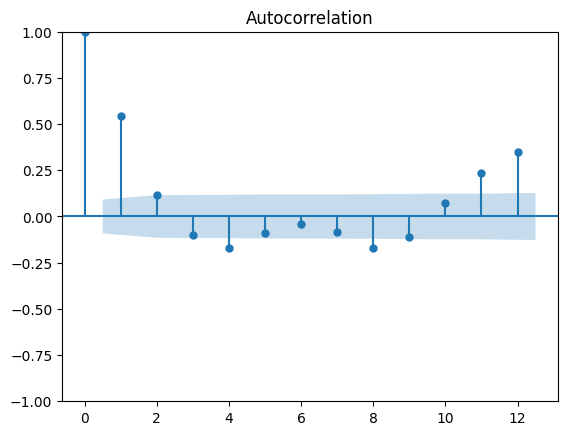

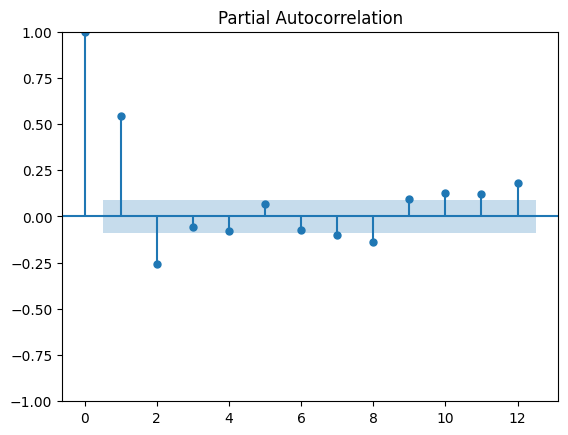

In [ ]:
plt.plot(result_season.resid)
ax = plt.gca()
ax.set_ylabel('Residual from quadratic trend model', fontsize = 'small')
ax.set_xlabel('date', fontsize = 'x-large')
plt.show()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(result_season.resid, lags=12)
plot_pacf(result_season.resid, lags=12)
plt.show()

Upon seeing the graph of the residuals we can say that there is a cycle. Since there is a clear cycle, we can say that there is a positive serial correlation.

In [ ]:
Y_q1s7 = np.log(dummy_df['elec'])
for p in range(0, 4):
  for q in range(0,4):
    if p == 0 and q == 0:
      pass
    else:
      X1 = dummy_df[['trend', 'trend2', 'm_1','m_2','m_3','m_4','m_5','m_6','m_7','m_8','m_9','m_10','m_11','m_12']]
      result_arma = ARIMA(Y_q1s7 , order=(p,0,q), trend='n', exog=X1).fit()
      print("result for p = {}, q = {}, is {}".format(p, q, result_arma.bic))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


result for p = 0, q = 1, is -1530.7576293125396


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


result for p = 0, q = 2, is -1547.5765083579865


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


result for p = 0, q = 3, is -1542.145644682743


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


result for p = 1, q = 0, is -1525.9342041880275


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


result for p = 1, q = 1, is -1548.9140129132552


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


result for p = 1, q = 2, is -1543.3013906206927


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


result for p = 1, q = 3, is -1535.3802680391454


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


result for p = 2, q = 0, is -1556.1683724256084


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


result for p = 2, q = 1, is -1552.2730081440307


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


result for p = 2, q = 2, is -1546.2736544953689


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


result for p = 2, q = 3, is -1542.8582479725283


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


result for p = 3, q = 0, is -1551.690433521817


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


result for p = 3, q = 1, is -1543.4884591080493


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


result for p = 3, q = 2, is -1272.940421628721
result for p = 3, q = 3, is -1538.6585015262417


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 We can see the lowest BIC value is -1556.1683724256084 is ARMA(2, 0) which is basically AR(2).

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


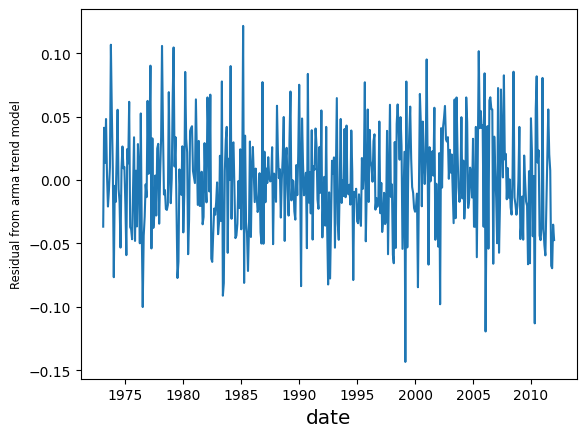

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


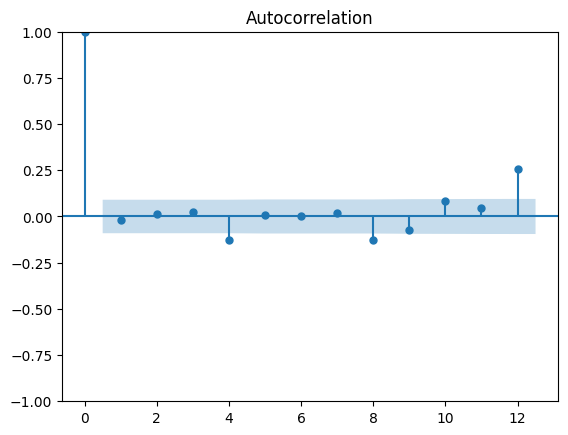

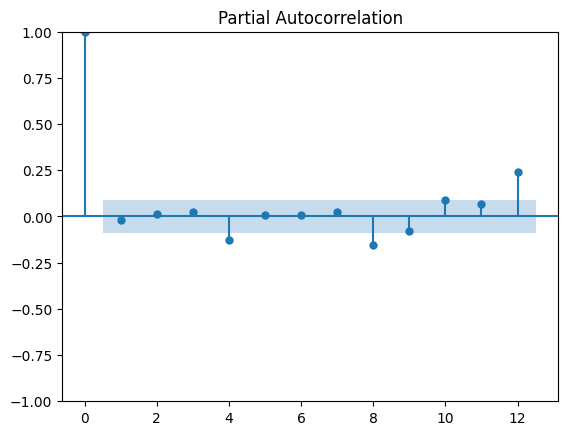

In [ ]:
X1 = dummy_df[['trend', 'trend2', 'm_1','m_2','m_3','m_4','m_5','m_6','m_7','m_8','m_9','m_10','m_11','m_12']]
result_chosen_arma = ARIMA(Y, order=(2, 0, 0), trend='n', exog=X1).fit()
plt.plot(result_chosen_arma.resid)
ax = plt.gca()
ax.set_ylabel('Residual from arma trend model', fontsize = 'small')
ax.set_xlabel('date', fontsize = 'x-large')
plt.show()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(result_chosen_arma.resid, lags=12)
plot_pacf(result_chosen_arma.resid, lags=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


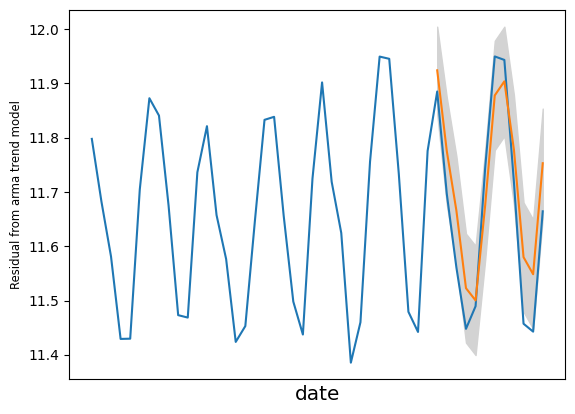

In [ ]:
result_chosen_arma = ARIMA(Y, order=(2, 0, 0), trend='n', exog=X1).fit()
# Make in-sample forecast for last 4 quarters
ar_predict = result_chosen_arma.get_prediction(start=-12, dynamic=True)
# forecast mean
mean_predict = ar_predict.predicted_mean
# get confidence interval of forecast
confidence_interval = ar_predict.conf_int()
#print(confidence_interval)
# plotting predictions
plt.figure()
plt.plot(elec['date'][-48:], Y[-48:])
plt.plot(elec['date'][-12:], mean_predict.values)
ax = plt.gca()
ax.set_ylabel('Residual from arma trend model', fontsize = 'small')
ax.set_xlabel('date', fontsize = 'x-large')
ax.set_xticks(['2008-01-01','2009-01-01', '2010-01-01', '2011-01-01'])
ax.set_xticklabels(['2008', '2009', '2010', '2011'], fontsize='large')
ax.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)
# Shade confidence interval
plt.fill_between(elec['date'][-12:],
                 confidence_interval['lower elec'], confidence_interval['upper elec'],
                 color='lightgrey')
plt.show()


In [ ]:
industrial = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/industrial.csv')
industrial.index = pd.date_range(start='1980-01-01', periods= industrial.shape[0], freq='M')

# Define start and end date of sample
start = '1980-01-01'
end = '2014-01-01'
#industrial

In [ ]:
industrial['const'] = 1

industrial['trend'] = np.arange(industrial.shape[0]) +1

Y = ['lip']
X = ['const', 'trend']

result_lin=sm.OLS(industrial[Y][:-12],industrial[X][:-12], missing='drop').fit()
print(result_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                    lip   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     4435.
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.27e-220
Time:                        00:20:49   Log-Likelihood:                 503.70
No. Observations:                 408   AIC:                            -1003.
Df Residuals:                     406   BIC:                            -995.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8944      0.007    556.252      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


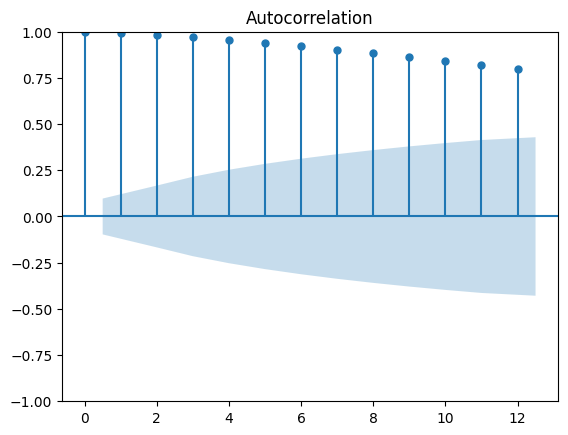

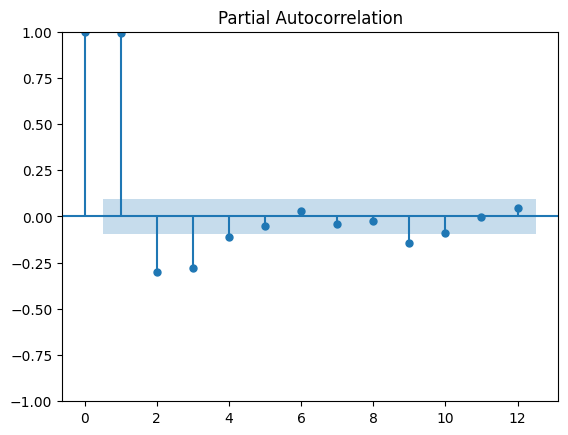

In [ ]:
# plt.plot(result_lin.resid)
# ax = plt.gca()
# ax.set_ylabel('Residual from quadratic trend model', fontsize = 'small')
# ax.set_xlabel('date', fontsize = 'x-large')
# plt.show()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(result_lin.resid, lags=12)
plot_pacf(result_lin.resid, lags=12)
plt.show()

An AR model will fit better as there is a sharp cut-off in the PACF plot after p = 1.

In [ ]:
industrial['const'] = 1

industrial['trend'] = np.arange(industrial.shape[0]) +1

Y = ['lip']
X = ['const', 'trend']
for i in range(1, 7):
  result_ar=ARIMA(industrial[Y], order=(i, 0, 0),trend='n', exog=industrial[X]).fit()
  print("result for i = {}, is {}".format(i, result_ar.bic))

result for i = 1, is -2968.915591446723
result for i = 2, is -2996.157867749759
result for i = 3, is -3020.0277760400922
result for i = 4, is -3028.178167346114
result for i = 5, is -3025.4592678168888
result for i = 6, is -3020.863764276574


In [ ]:
chosen_ar=ARIMA(industrial[Y], order=(4, 0, 0), trend='n', exog=industrial[X]).fit()
print(chosen_ar.summary())

from statsmodels.stats import stattools as st
st.durbin_watson(chosen_ar.resid)
#No autocorrelation

                               SARIMAX Results                                
Dep. Variable:                    lip   No. Observations:                  420
Model:                 ARIMA(4, 0, 0)   Log Likelihood                1535.230
Date:                Tue, 02 May 2023   AIC                          -3056.460
Time:                        00:20:58   BIC                          -3028.178
Sample:                    01-31-1980   HQIC                         -3045.282
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9295      0.082     47.656      0.000       3.768       4.091
trend          0.0018      0.000      6.124      0.000       0.001       0.002
ar.L1          1.1479      0.033     34.919      0.0

2.0092094071255

 Upon running the durbin watson test, we get the Durbin-Watson score of 2. This suggests that there is no autocorrelation detected in the sample.

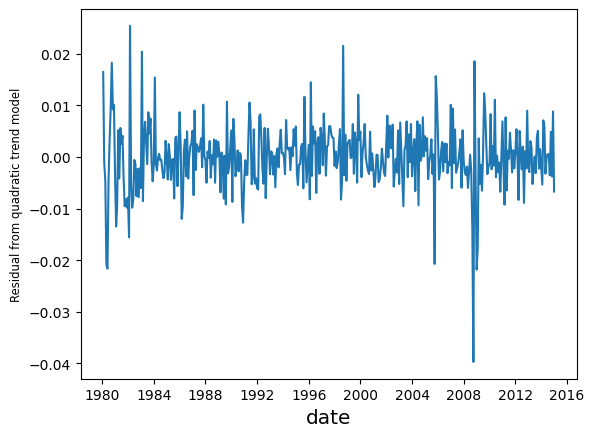

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


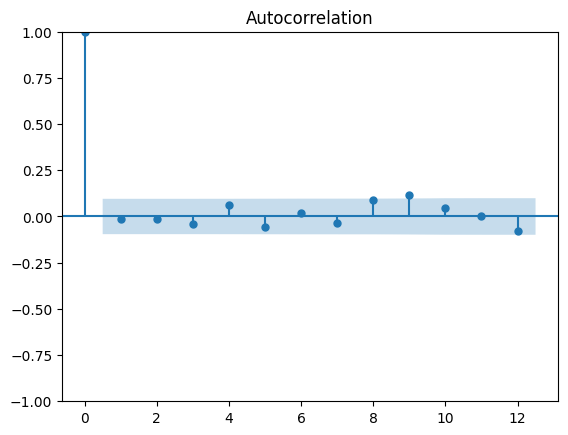

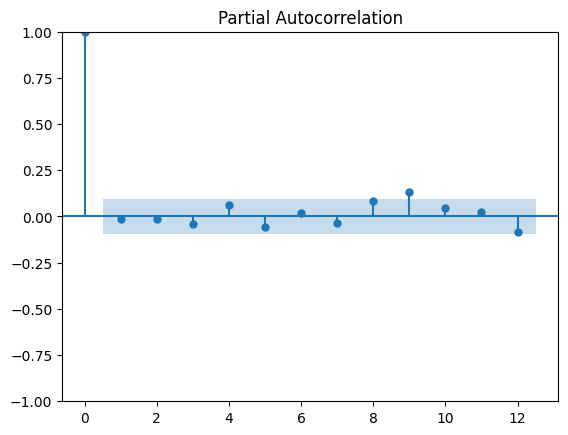

In [ ]:
plt.plot(chosen_ar.resid)
ax = plt.gca()
ax.set_ylabel('Residual from quadratic trend model', fontsize = 'small')
ax.set_xlabel('date', fontsize = 'x-large')
plt.show()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(chosen_ar.resid, lags=12)
plot_pacf(chosen_ar.resid, lags=12)
plt.show()

 After seeing the correlogram and the probability of Q using the Ljung Box test. We can say that we cannot reject the null that there is no serial correlation

In [ ]:
from statsmodels.stats import diagnostic
bgtest = diagnostic.acorr_breusch_godfrey(chosen_ar, nlags = 6)
print('Breusch Godfrey test LM statistic: ', bgtest[0])
print('Breusch Godfrey test LM p-value: ', bgtest[1])
#reject null hypothesis

Breusch Godfrey test LM statistic:  4.078511534050708
Breusch Godfrey test LM p-value:  0.6660523865847761


Upon running the Breusch Godfrey test, we can say that we reject the null hyopthesis at a significance value of 5%(0.05)

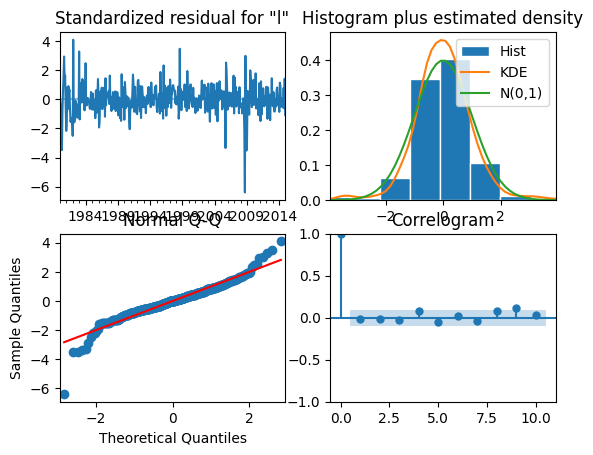

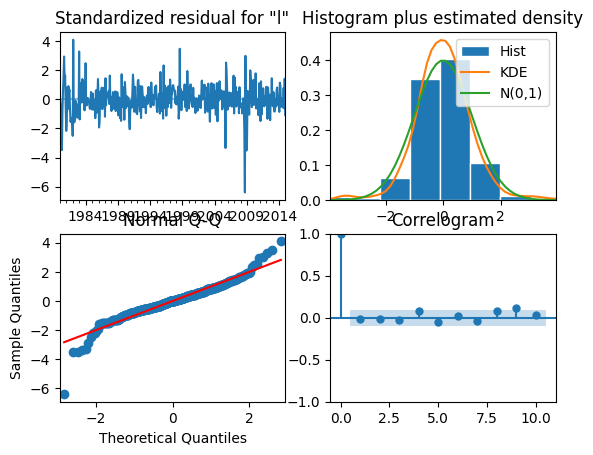

In [ ]:
chosen_ar.plot_diagnostics()

From the above diagnostics, we can see that the residual has a big drop off around 2008-2009. We can see all the outliers in the quantiles graph that should come from this same period of recession.

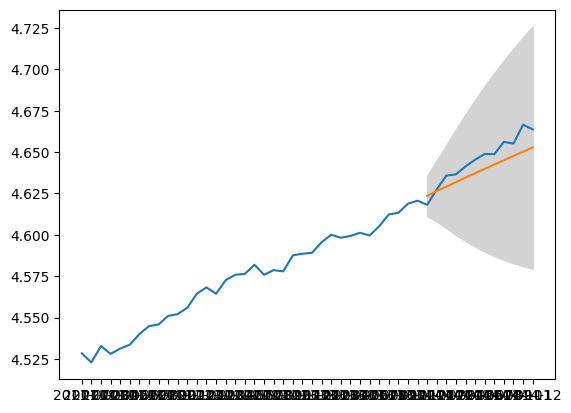

In [ ]:

# Make in-sample forecast for last 12 months
ar_predict = chosen_ar.get_prediction(start=-12, dynamic=True)
# forecast mean
mean_predict = ar_predict.predicted_mean
# get confidence interval of forecast
confidence_interval = ar_predict.conf_int()

# plotting predictions
plt.figure()
plt.plot(industrial['date'][-48:], industrial['lip'][-48:], label = 'Predictions')
plt.plot(industrial['date'][-12:], mean_predict.values)

# Shade confidence interval
plt.fill_between(industrial['date'][-12:],
                 confidence_interval['lower lip'], confidence_interval['upper lip'],
                 color='lightgrey')
plt.show()


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats

!pip install arch
from arch import arch_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
usdaud = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/usdaud.csv')
usdaud.index = pd.date_range(start='2001-01-02', periods= usdaud.shape[0], freq='D')

Text(0.5, 1.0, 'log(exchange rate) vs time')

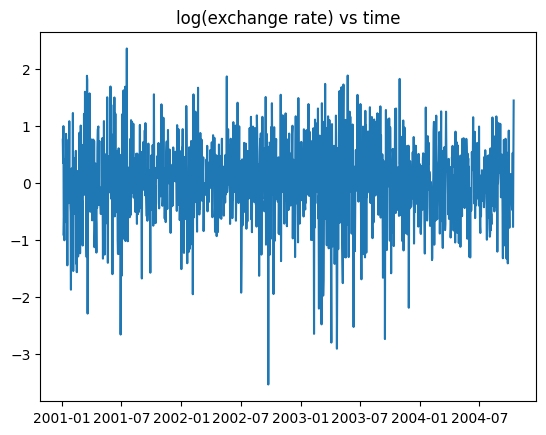

In [ ]:
yt = np.log(usdaud['USDAUD']).diff() * 100
usdaud['yt'] = yt
plt.plot(usdaud['yt'])
plt.title("log(exchange rate) vs time")

From the histogram above we can see various spikes above and below zero. This implies that there is volatility clustering.

Step 3: Plot the histogram and compute the descriptive statistics of $y_t$. Conduct the proper test to see if it is normally distributed.

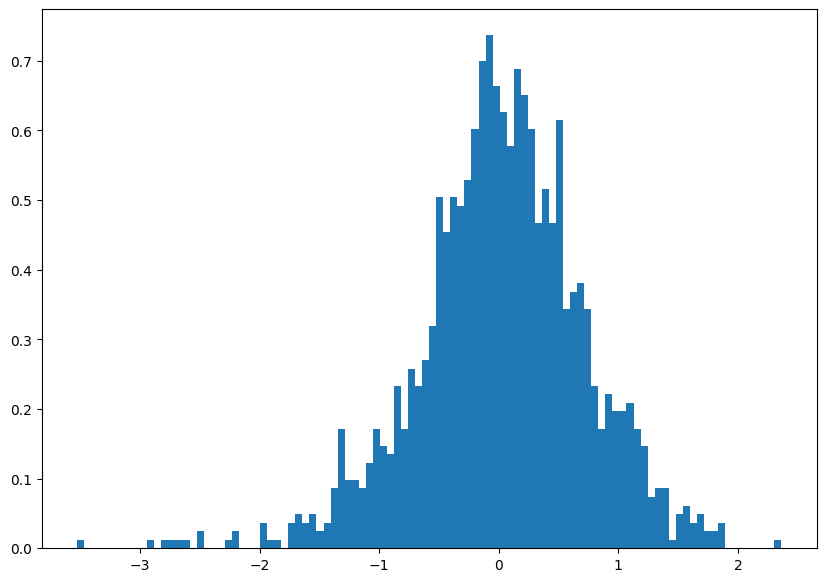

count    1381.000000
mean        0.020510
std         0.699923
min        -3.529074
25%        -0.377257
50%         0.036623
75%         0.463301
max         2.364642
Name: yt, dtype: float64
Skewness:  -0.4365038830558951
Kurtosis:  1.3804256502583199
Jarque-Bera test statistic is:  151.93178356846514
Jarque-Bera test p-value is:  1.0196060065334156e-33


In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(usdaud['yt'].dropna(),density = 1, bins = 100)
plt.show()
print(usdaud['yt'].describe())
print('Skewness: ', usdaud['yt'].skew())
print('Kurtosis: ', usdaud['yt'].kurt())
print('Jarque-Bera test statistic is: ', stats.jarque_bera(usdaud['yt'].dropna())[0])
print('Jarque-Bera test p-value is: ', stats.jarque_bera(usdaud['yt'].dropna())[1])

In order to check if the distribution is normally distributed, we conduct the Jarque-Bera test. Upon running this test, we get a very small p-value of 1 * 10^-33. Hence,we can reject the null hypothesisa that the skewness is zero and the excess kurtosis is zero

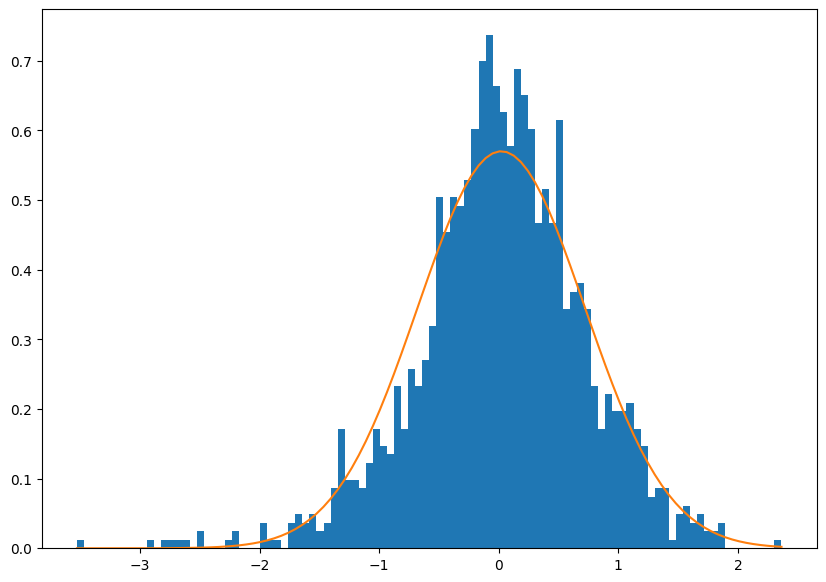

In [ ]:
from scipy.stats import norm
fig, ax = plt.subplots(figsize =(10, 7))
_,bins,_ = ax.hist(usdaud['yt'].dropna(),density = 1,  bins = 100)
mu, sigma = stats.norm.fit(usdaud['yt'].dropna())
# mu = np.mean(np.array(usdaud['yt'].dropna()))
# sigma = np.sqrt(np.var(np.array(usdaud['yt'].dropna())))
# print(mu, sigma)
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.show()

The distribution is not leptokurtic since Kurtosis value is less than 3.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


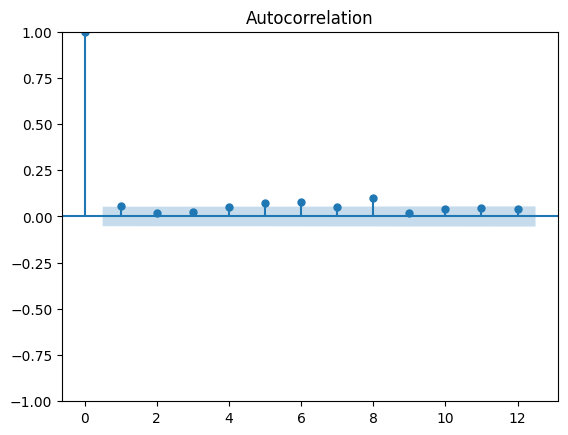

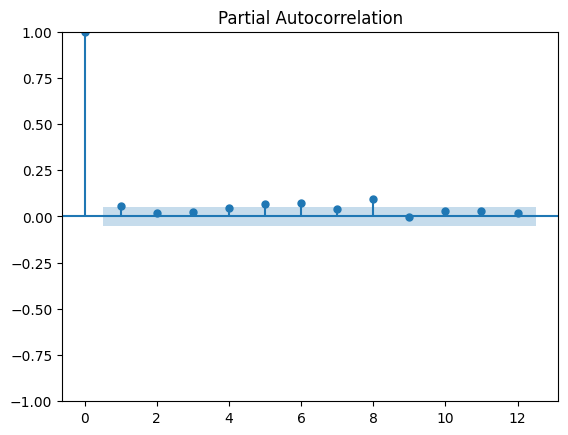

In [ ]:
usdaud['yt_sq'] = usdaud['yt']**2
plot_acf(usdaud['yt_sq'].dropna(), lags = 12)
plot_pacf(usdaud['yt_sq'].dropna(), lags = 12)
plt.show()

There is no serial correlation since there is no value of ACF or PACF that is significantly higher or lower than 0 for any lag >= 1.

In [ ]:

ar_model = ARIMA(usdaud['yt_sq'].dropna(), order=(1,0,0))
ar_results = ar_model.fit()
print(ar_results.summary())

                               SARIMAX Results                                
Dep. Variable:                  yt_sq   No. Observations:                 1381
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1799.980
Date:                Mon, 01 May 2023   AIC                           3605.960
Time:                        22:33:05   BIC                           3621.651
Sample:                    01-03-2001   HQIC                          3611.829
                         - 10-14-2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4900      0.040     12.144      0.000       0.411       0.569
ar.L1          0.0592      0.020      3.012      0.003       0.021       0.098
sigma2         0.7936      0.010     78.557      0.0

In [ ]:
from arch import arch_model
result_arch5 = arch_model(yt.dropna(), vol='Garch', p=1, q=0, dist='Normal').fit()
print(result_arch5.summary())
result_garch = arch_model(yt.dropna(), vol='Garch', p=1, q=1, dist='Normal').fit()
print(result_garch.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 9893.206210230715
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2773.120669566357
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1466.8095986883125
Iteration:      4,   Func. Count:     26,   Neg. LLF: 3097.931786854494
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1471.6143535408974
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1462.8254905954063
Iteration:      7,   Func. Count:     41,   Neg. LLF: 1462.8172947437365
Iteration:      8,   Func. Count:     45,   Neg. LLF: 1462.8169311051083
Iteration:      9,   Func. Count:     49,   Neg. LLF: 1462.8168780595734
Iteration:     10,   Func. Count:     52,   Neg. LLF: 1462.8168780595238
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1462.8168780595734
            Iterations: 10
            Function evaluations: 52
            Gradient evaluations: 10
                      Constant Mean - ARCH Model Results       

 Based of the SIC of the two models, we can say that GARCH fits the model better since it has an SIC of 2891 which is lower than the SIC of the ARCH model whose SIC is 2947.33.

In [ ]:
result_ar_arch = arch_model(yt.dropna(), mean='AR', lags = 1, vol='Garch', p=1, q=0, dist='Normal').fit()
print(result_ar_arch.summary())
result_ar_garch = arch_model(yt.dropna(), mean='AR', lags = 1, vol='Garch', p=1, q=1, dist='Normal').fit()
print(result_ar_garch.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 10369.59876440008
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6344.205996087374
Iteration:      3,   Func. Count:     24,   Neg. LLF: 8127.318432044737
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1467.9667339185862
Iteration:      5,   Func. Count:     37,   Neg. LLF: 3477285.412488196
Iteration:      6,   Func. Count:     43,   Neg. LLF: 1558.2018090223341
Iteration:      7,   Func. Count:     50,   Neg. LLF: 1461.3332532358413
Iteration:      8,   Func. Count:     55,   Neg. LLF: 1461.259194028727
Iteration:      9,   Func. Count:     60,   Neg. LLF: 1461.257073155249
Iteration:     10,   Func. Count:     65,   Neg. LLF: 1461.25695986453
Iteration:     11,   Func. Count:     70,   Neg. LLF: 1461.2569567961366
Iteration:     12,   Func. Count:     74,   Neg. LLF: 1461.2569567962046
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1461.2569567961366
            Iterations:

Upon seeing the 4 models, we can say the GARCH (1,1) model fits the best since it has the lowest SIC of the four models.

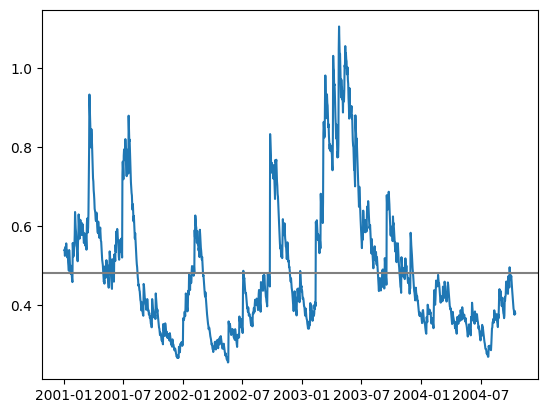

In [ ]:
omega = result_garch.params[1]
alpha = result_garch.params[2]
beta = result_garch.params[3]
unconditional_volatility = omega/(1-alpha-beta)

plt.plot(result_garch.conditional_volatility**2)
plt.axhline(unconditional_volatility, color='grey')
plt.show()
